In [5]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from ipywidgets import interact

eps = 10**(-4)
G = 6.67e-11
A_NFW = 4.625
f_b = 0.16

z = 1

hubble_factor = 1/(1+z)

H_0 = 2.27e-18

H = H_0 * np.sqrt(1e-3 * hubble_factor**(-4) + 0.3 * hubble_factor**(-3) + 0 * hubble_factor**(-2) + 0.7)

print(H)

M_halo = 1e15 * 2e30 #kg
G = 6.67e-11

rho_cr = 3 * H**2 / (8 * np.pi * G)

Delta = 200

r_halo = (2*G*M_halo / (H**2 * Delta))**(1/3)

vc2_halo = G * M_halo / r_halo

print('The halo radius is', r_halo / 3.086e19, 'kpc')
print('The halo circular velocity is', np.sqrt(vc2_halo)/1e3, 'km/s')

def vc2_NFW_template(x):
    return A_NFW * (np.log(1+x) / x - 1 / (1+x))

c = 10

x_values = np.linspace(0.01, 10, 500)

halo_vc2_ratio = vc2_NFW_template(c)

vphi2 = vc2_halo / halo_vc2_ratio

print('The maximum circular velocity is', np.sqrt(vphi2)/1e3, 'km/s')

rmax = 2.16258

def alpha(x):
    return 1.5

def integrandf_P(t):
    return alpha(t) / t

def f_P(x):        
    resultf_P, _ = integrate.quad(integrandf_P, 1+eps, x, limit=50)
    return np.exp(-resultf_P)

def v2_NFW(x):
    return A_NFW * vphi2 * (np.log(1+x) / x - 1 / (1+x))

def integrandI(t):
    return vphi2 * alpha(t) * f_P(t) * t**2 / (v2_NFW(t))

def I(x):        
    resultI, _ = integrate.quad(integrandI, eps, x, limit=50)
    return resultI

I_vec = np.vectorize(I)
y_I = I_vec(x_values)


M_CGM = f_b * M_halo

r_0 = r_halo / c

P_0 = M_CGM * vphi2 / (4*np.pi * r_0**3 * I(r_halo/r_0))

P_0

def rho(x):
    return P_0 * alpha(x) * f_P(x) / v2_NFW(x)

def SMD(r_p):
    return 5.244 * r_p * rho(r_p / r_0)

4.007048340112706e-18
The halo radius is 1413.9681718000284 kpc
The halo circular velocity is 1748.4778585507963 km/s
The maximum circular velocity is 2107.1014794419784 km/s


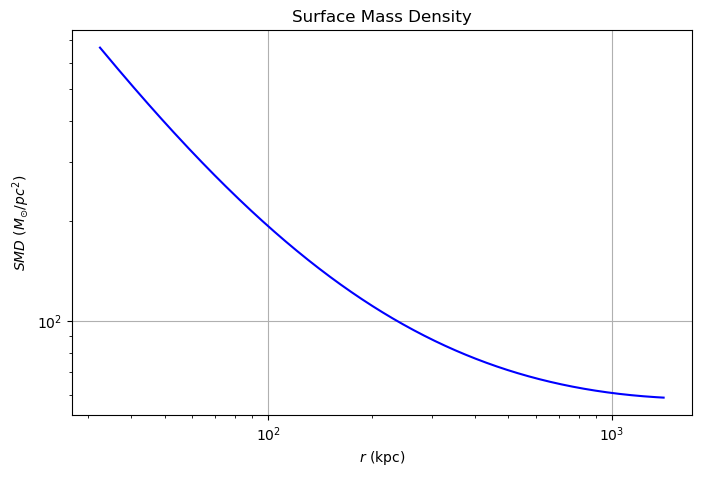

In [28]:
# Define r_p values for plotting
r_p_values = np.linspace(1e21, r_halo, 1000)  # Ensure r_p is within a meaningful range
SMD_values = np.vectorize(SMD)(r_p_values)  # Compute SMD for each r_p
r_p_values_kpc = r_p_values / 3.086e19
SMD_values_Msunpc2 = SMD_values * 476.1698
# Plot
plt.figure(figsize=(8, 5))
plt.plot(r_p_values_kpc, SMD_values_Msunpc2, color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r$ (kpc)')
plt.ylabel(r'$SMD$ ($M_{\odot} / pc^2$)')
plt.title('Surface Mass Density')
plt.grid()
plt.show()
